In [67]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from skimage import exposure

#load the dataset
digits = load_digits()

In [68]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


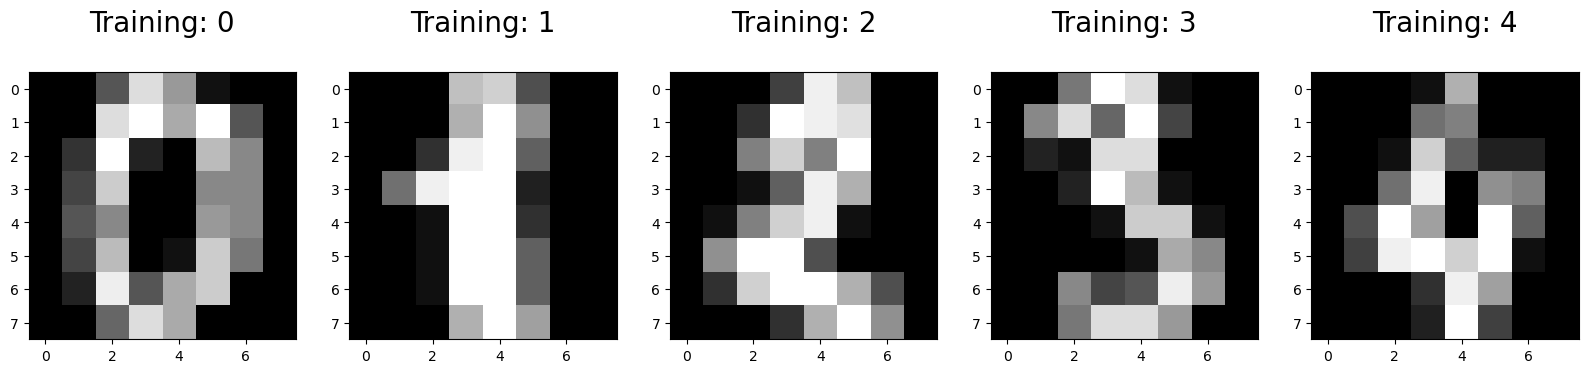

In [69]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

#### Preprocess the images

Contrast Stretching: This technique enhances the contrast of the images by stretching the intensity range of pixel values. It improves the visual quality of the images and helps in capturing important details.

In [70]:
# Reshape the images to 2D arrays
X = digits.data.reshape(-1, 8, 8)

# Preprocess the images
X_preprocessed = []
for image in X:
    # Apply contrast stretching
    p2, p98 = np.percentile(image, (2, 98))
    img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

    # Flatten the preprocessed image
    img_flat = img_rescale.flatten()
    X_preprocessed.append(img_flat)

X_preprocessed = np.array(X_preprocessed)


In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, digits.target, test_size=0.2,
random_state = 42 )

# Train set: Used to train the machine learning model. The model learns from this data.
# Test set: Used to evaluate the performance of the trained model on unseen data. It helps assess the generalization ability of the model.

#### Training a Random Forest classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

The n_estimators parameter specifies the number of trees in the random forest. Increasing the number of trees generally improves the performance of the model up to a certain point, as it reduces the variance of the model without increasing the bias significantly. However, adding too many trees can lead to longer training times and may not necessarily improve performance beyond a certain threshold.

Control over Overfitting: Tuning n_estimators allows us to control the tendency of the model to overfit the training data. By finding the right balance, we can prevent the model from memorizing noise in the training data and improve its performance on the test set.

In [73]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

#### Model Accuracy and Confusion Matrix, how often is the classifier correct

Training Accuracy: 1.0
Testing Accuracy: 0.9805555555555555


Text(0.5, 1.0, 'Test Confusion Matrix')

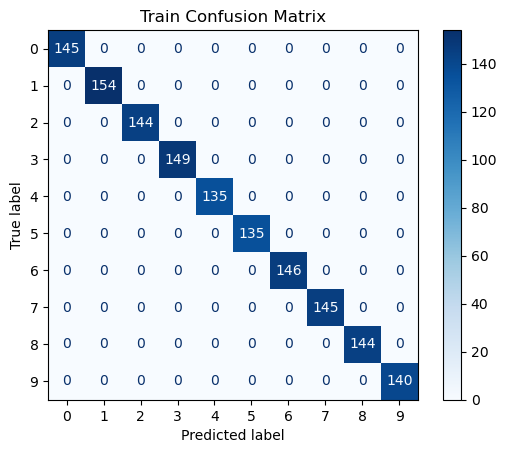

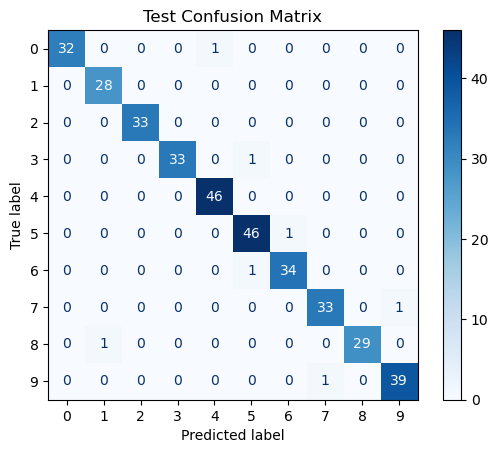

In [74]:
#Model Accuracy and Confusion Matrix, how often is the classifier correct
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print(f'Training Accuracy: {accuracy_score(y_train, y_train_pred)}')
print(f'Testing Accuracy: {accuracy_score(y_test, y_test_pred)}')

cm = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Train Confusion Matrix')

cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot(cmap='Blues')
plt.title('Test Confusion Matrix')

In [75]:
class_labels = [f"Class {i}" for i in range(10)]
for i in range(10):
    total_samples = np.sum(cm[i])
    correct_predictions = cm[i][i]
    accuracy = correct_predictions / total_samples
    print(f"Accuracy for {class_labels[i]}: {accuracy:.2f}")

Accuracy for Class 0: 0.97
Accuracy for Class 1: 1.00
Accuracy for Class 2: 1.00
Accuracy for Class 3: 0.97
Accuracy for Class 4: 1.00
Accuracy for Class 5: 0.98
Accuracy for Class 6: 0.97
Accuracy for Class 7: 0.97
Accuracy for Class 8: 0.97
Accuracy for Class 9: 0.97


The model's performance seems quite good, with high accuracy scores across most classes. However, it's essential to consider other metrics like precision, recall, and F1-score to get a comprehensive understanding of the model's performance, especially in scenarios with class imbalance or differing misclassification costs.

#### Calculate precision, recall, and F1-score with averaging strategy "macro"

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score with averaging strategy "macro"
precision_macro = precision_score(y_test, y_test_pred, average='macro')
recall_macro = recall_score(y_test, y_test_pred, average='macro')
f1_macro = f1_score(y_test, y_test_pred, average='macro')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision (macro):", precision_macro)
print("Recall (macro):", recall_macro)
print("F1-score (macro):", f1_macro)


Accuracy: 0.975
Precision (macro): 0.9819590785690652
Recall (macro): 0.9802692082635762
F1-score (macro): 0.9809882170471784


The "macro" averaging strategy computes the metric independently for each class and then takes the unweighted mean of the scores. This provides an equal contribution of each class to the overall score, regardless of class imbalance.

The Random Forest model performs quite well overall on the test set, achieving high accuracies for most classes. The model's performance metrics, including accuracy, precision, recall, and F1-score, were evaluated using the "macro" averaging strategy to ensure a balanced assessment across all classes.

#### Perform hyperparameter tuning using GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

# Perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [78]:
# Train the classifier with the best parameters
best_rf_classifier = grid_search.best_estimator_
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [79]:
# Make predictions using the best classifier
y_pred_best = best_rf_classifier.predict(X_test)

In [80]:
# Evaluate the performance of the best classifier
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Print the metrics
print('Accuracy BEST: {:.3f}'.format(accuracy_best))
print('Accuracy: {:.3f}'.format(accuracy))
print()
print('Precision BEST: {:.3f}'.format(precision_best))
print('Precision (macro): {:.3f}'.format(precision_macro))
print()
print('Recall BEST: {:.3f}'.format(recall_best))
print('Recall (macro): {:.3f}'.format(recall_macro))
print()
print('F1-score BEST: {:.3f}'.format(f1_best))
print('F1-score (macro): {:.3f}'.format(f1_macro))

Accuracy BEST: 0.981
Accuracy: 0.975

Precision BEST: 0.981
Precision (macro): 0.982

Recall BEST: 0.981
Recall (macro): 0.980

F1-score BEST: 0.981
F1-score (macro): 0.981


The consistency between the metrics obtained from grid search and the performance on the test set indicates that the hyperparameters found through grid search generalize well and lead to a model with strong performance on unseen data.

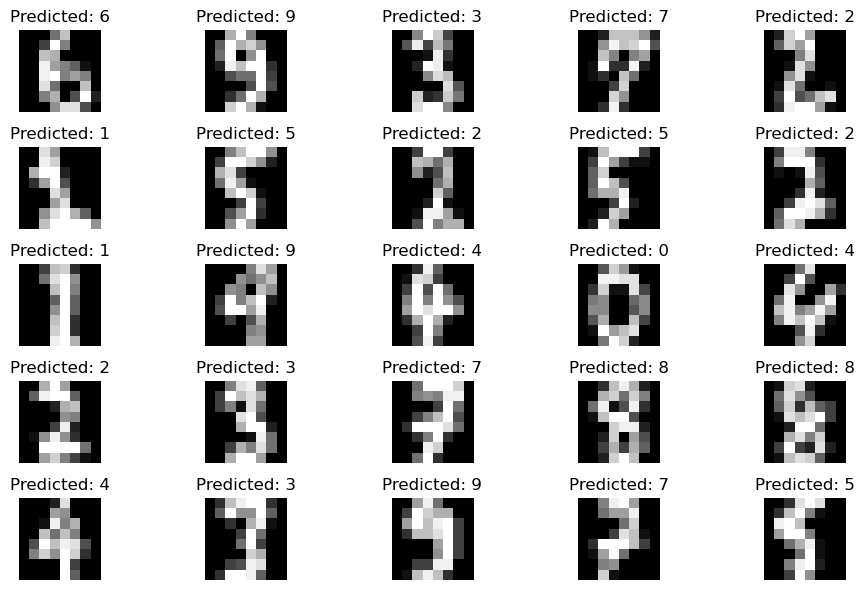

In [81]:
# Visualize some sample images and their predicted labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    image = X_test[i].reshape(8, 8)
    predicted_label = y_pred_best[i]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Predicted: {predicted_label}")
    ax.axis('off')
plt.tight_layout()
plt.show()